In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


### Cell 2: Load and display basic dataset information
### Read the dataset

In [2]:

df = pd.read_csv('final_project_dataset_complete.csv')

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"\nDataset Shape: {df.shape}")
print("\nDataset Information:")
df.info()

Dataset Overview:
--------------------------------------------------

Dataset Shape: (9000, 11)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


### Cell 3: Display first few rows and basic statistics

In [3]:

print("First 5 rows of the dataset:")
display(df.head())

print("\nStatistical summary of numerical features:")
display(df.describe())

First 5 rows of the dataset:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0



Statistical summary of numerical features:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


### Cell 4: Check for missing values

In [4]:

print("Missing Values Analysis:")
display(df.isnull().sum())
print("\nPercentage of missing values:")
display((df.isnull().sum() / len(df) * 100).round(2))

Missing Values Analysis:


feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64


Percentage of missing values:


feature_1     0.00
feature_2     0.00
feature_3     4.44
feature_4     0.00
feature_5     0.00
feature_6     5.56
feature_7     0.00
feature_8     0.00
category_1    0.00
category_2    0.00
target        0.00
dtype: float64

### Cell 5: Analyze numerical features distributions
### Create histograms for numerical features

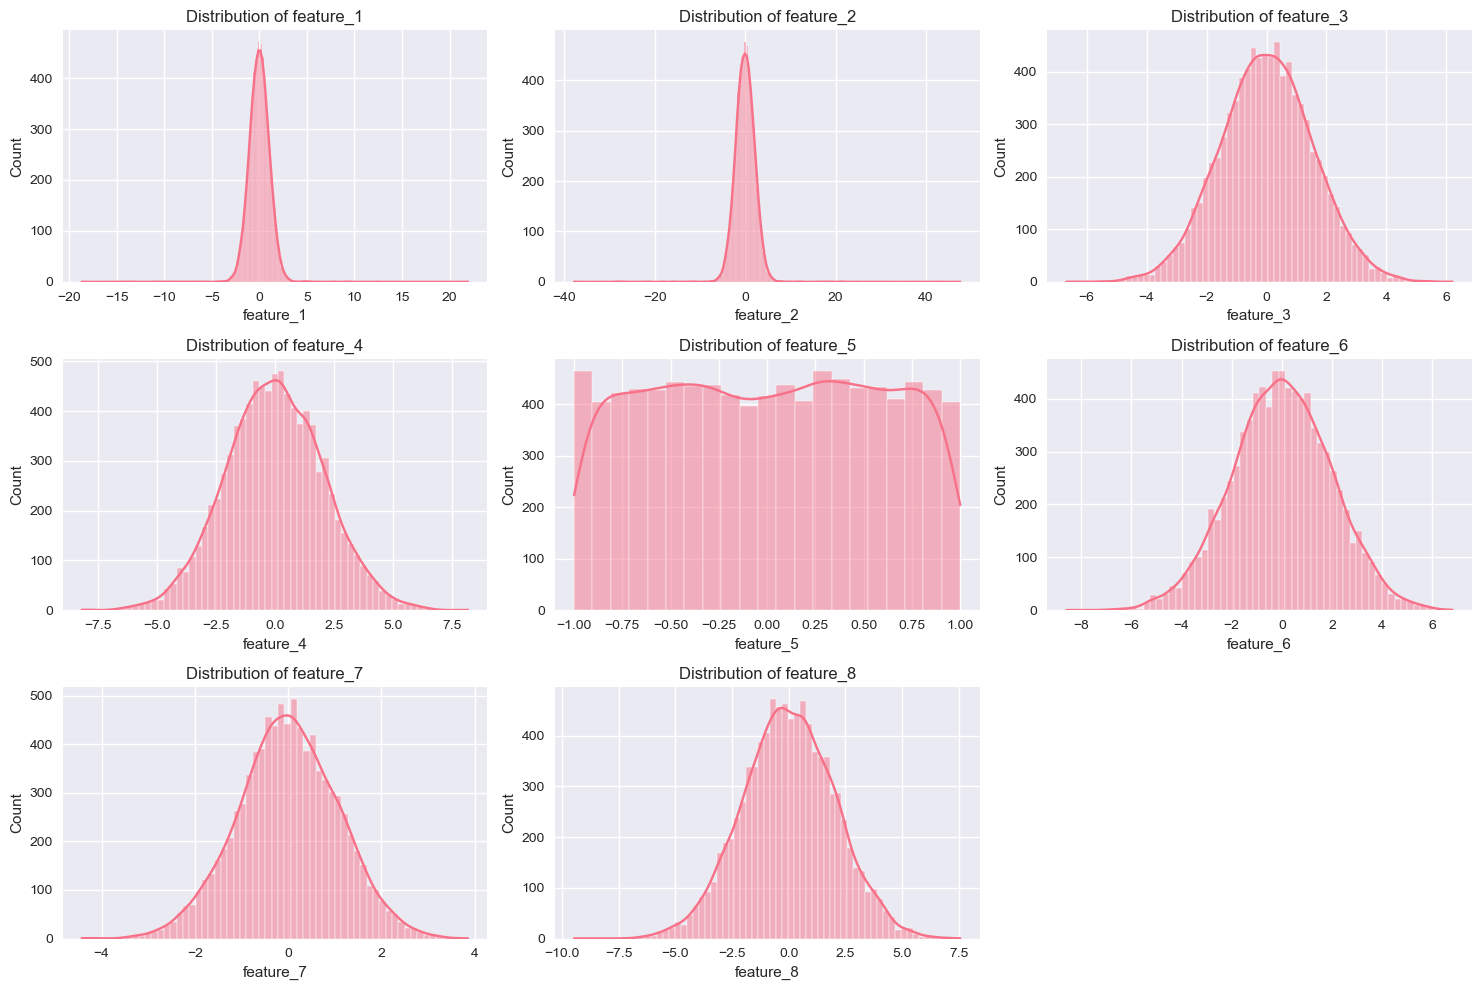

In [5]:

numerical_features = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Cell 6: Create box plots for numerical features

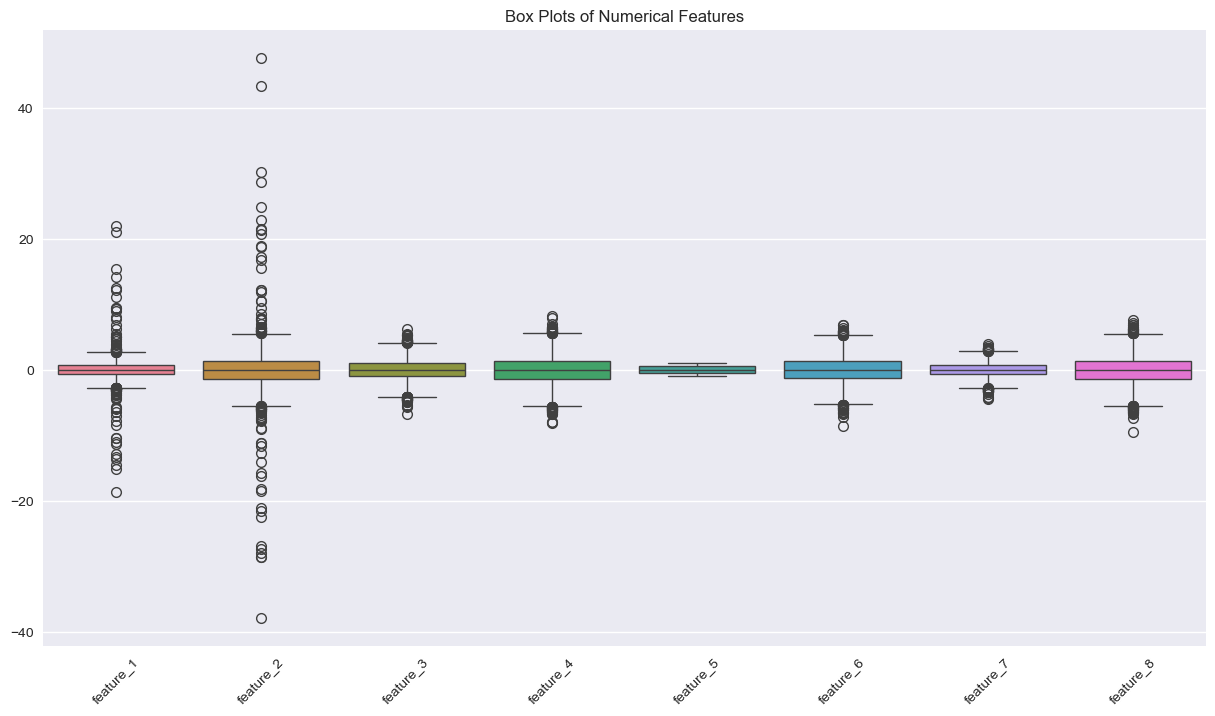

In [6]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features')
plt.show()

### Cell 7: Analyze categorical features



Value counts for category_1:


category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

category_1
Low              0.311
High             0.307
Above Average    0.192
Below Average    0.190
Name: proportion, dtype: float64

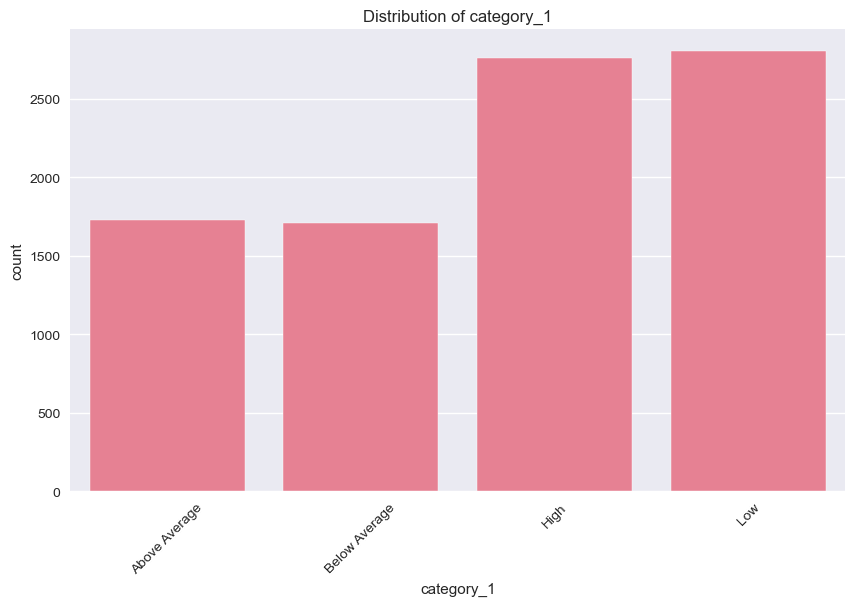


Value counts for category_2:


category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

category_2
Region B    0.402
Region A    0.395
Region C    0.203
Name: proportion, dtype: float64

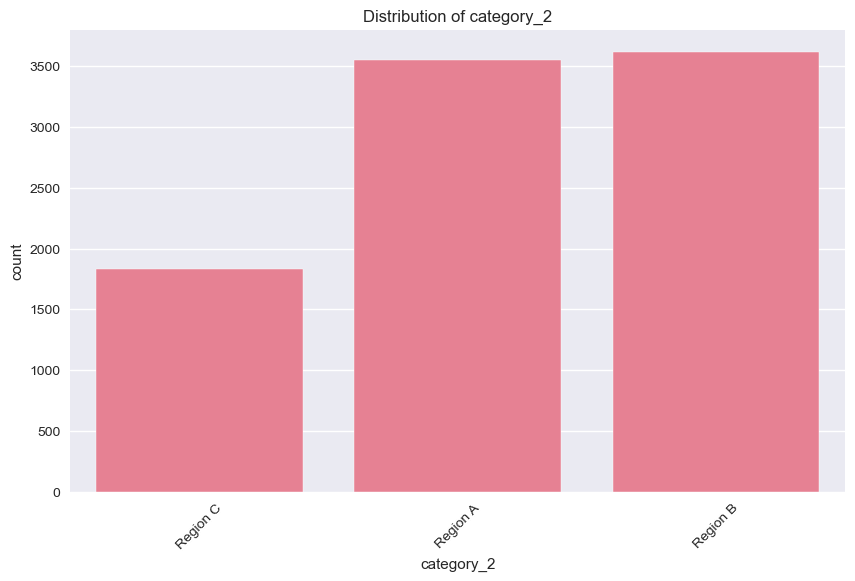

In [7]:
for cat_feature in ['category_1', 'category_2']:
    print(f"\nValue counts for {cat_feature}:")
    display(df[cat_feature].value_counts())
    display(df[cat_feature].value_counts(normalize=True).round(3))
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat_feature)
    plt.title(f'Distribution of {cat_feature}')
    plt.xticks(rotation=45)
    plt.show()

### Cell 8: Create correlation matrix heatmap

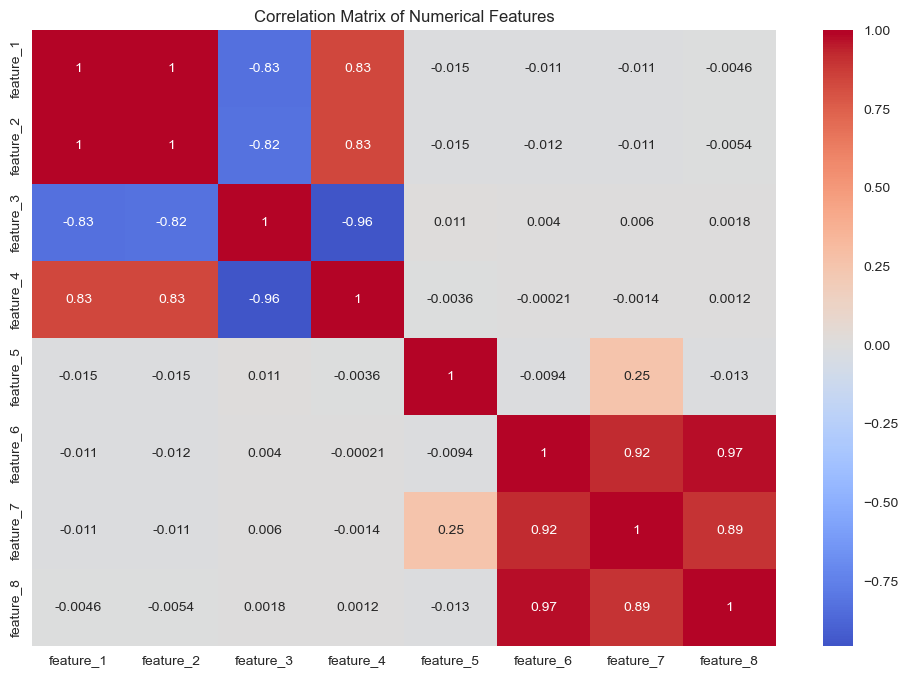

In [8]:

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Cell 9: Feature Descriptions and Value Ranges

In [9]:
def describe_feature(df, feature_name):
    """Generate comprehensive description for a given feature"""
    description = {
        'count': len(df[feature_name]),
        'unique_values': df[feature_name].nunique(),
        'min': df[feature_name].min(),
        'max': df[feature_name].max(),
        'mean': df[feature_name].mean() if pd.api.types.is_numeric_dtype(df[feature_name]) else None,
        'std': df[feature_name].std() if pd.api.types.is_numeric_dtype(df[feature_name]) else None,
        'data_type': str(df[feature_name].dtype)
    }
    return description

# Create feature descriptions
print("Detailed Feature Descriptions:")
print("-" * 50)

# Analyze numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Features:")
for feature in numerical_features:
    desc = describe_feature(df, feature)
    print(f"\n{feature}:")
    print(f"Data Type: {desc['data_type']}")
    print(f"Count: {desc['count']:,}")
    print(f"Range: {desc['min']:.2f} to {desc['max']:.2f}")
    print(f"Mean: {desc['mean']:.2f}")
    print(f"Standard Deviation: {desc['std']:.2f}")
    print(f"Number of Unique Values: {desc['unique_values']:,}")

# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for feature in categorical_features:
    desc = describe_feature(df, feature)
    print(f"\n{feature}:")
    print(f"Data Type: {desc['data_type']}")
    print(f"Count: {desc['count']:,}")
    print(f"Number of Unique Values: {desc['unique_values']:,}")
    print("\nValue Distribution:")
    print(df[feature].value_counts().to_string())

Detailed Feature Descriptions:
--------------------------------------------------

Numerical Features:

feature_1:
Data Type: float64
Count: 9,000
Range: -18.67 to 21.93
Mean: 0.00
Standard Deviation: 1.24
Number of Unique Values: 9,000

feature_2:
Data Type: float64
Count: 9,000
Range: -37.85 to 47.60
Mean: 0.00
Standard Deviation: 2.51
Number of Unique Values: 9,000

feature_3:
Data Type: float64
Count: 9,000
Range: -6.68 to 6.20
Mean: 0.00
Standard Deviation: 1.54
Number of Unique Values: 8,600

feature_4:
Data Type: float64
Count: 9,000
Range: -8.19 to 8.19
Mean: -0.01
Standard Deviation: 2.06
Number of Unique Values: 9,000

feature_5:
Data Type: float64
Count: 9,000
Range: -1.00 to 1.00
Mean: -0.00
Standard Deviation: 0.58
Number of Unique Values: 9,000

feature_6:
Data Type: float64
Count: 9,000
Range: -8.59 to 6.80
Mean: -0.01
Standard Deviation: 1.98
Number of Unique Values: 8,500

feature_7:
Data Type: float64
Count: 9,000
Range: -4.42 to 3.86
Mean: 0.00
Standard Deviation: 1.

### Cell 10: Scatter Plot Matrix for Numerical Features

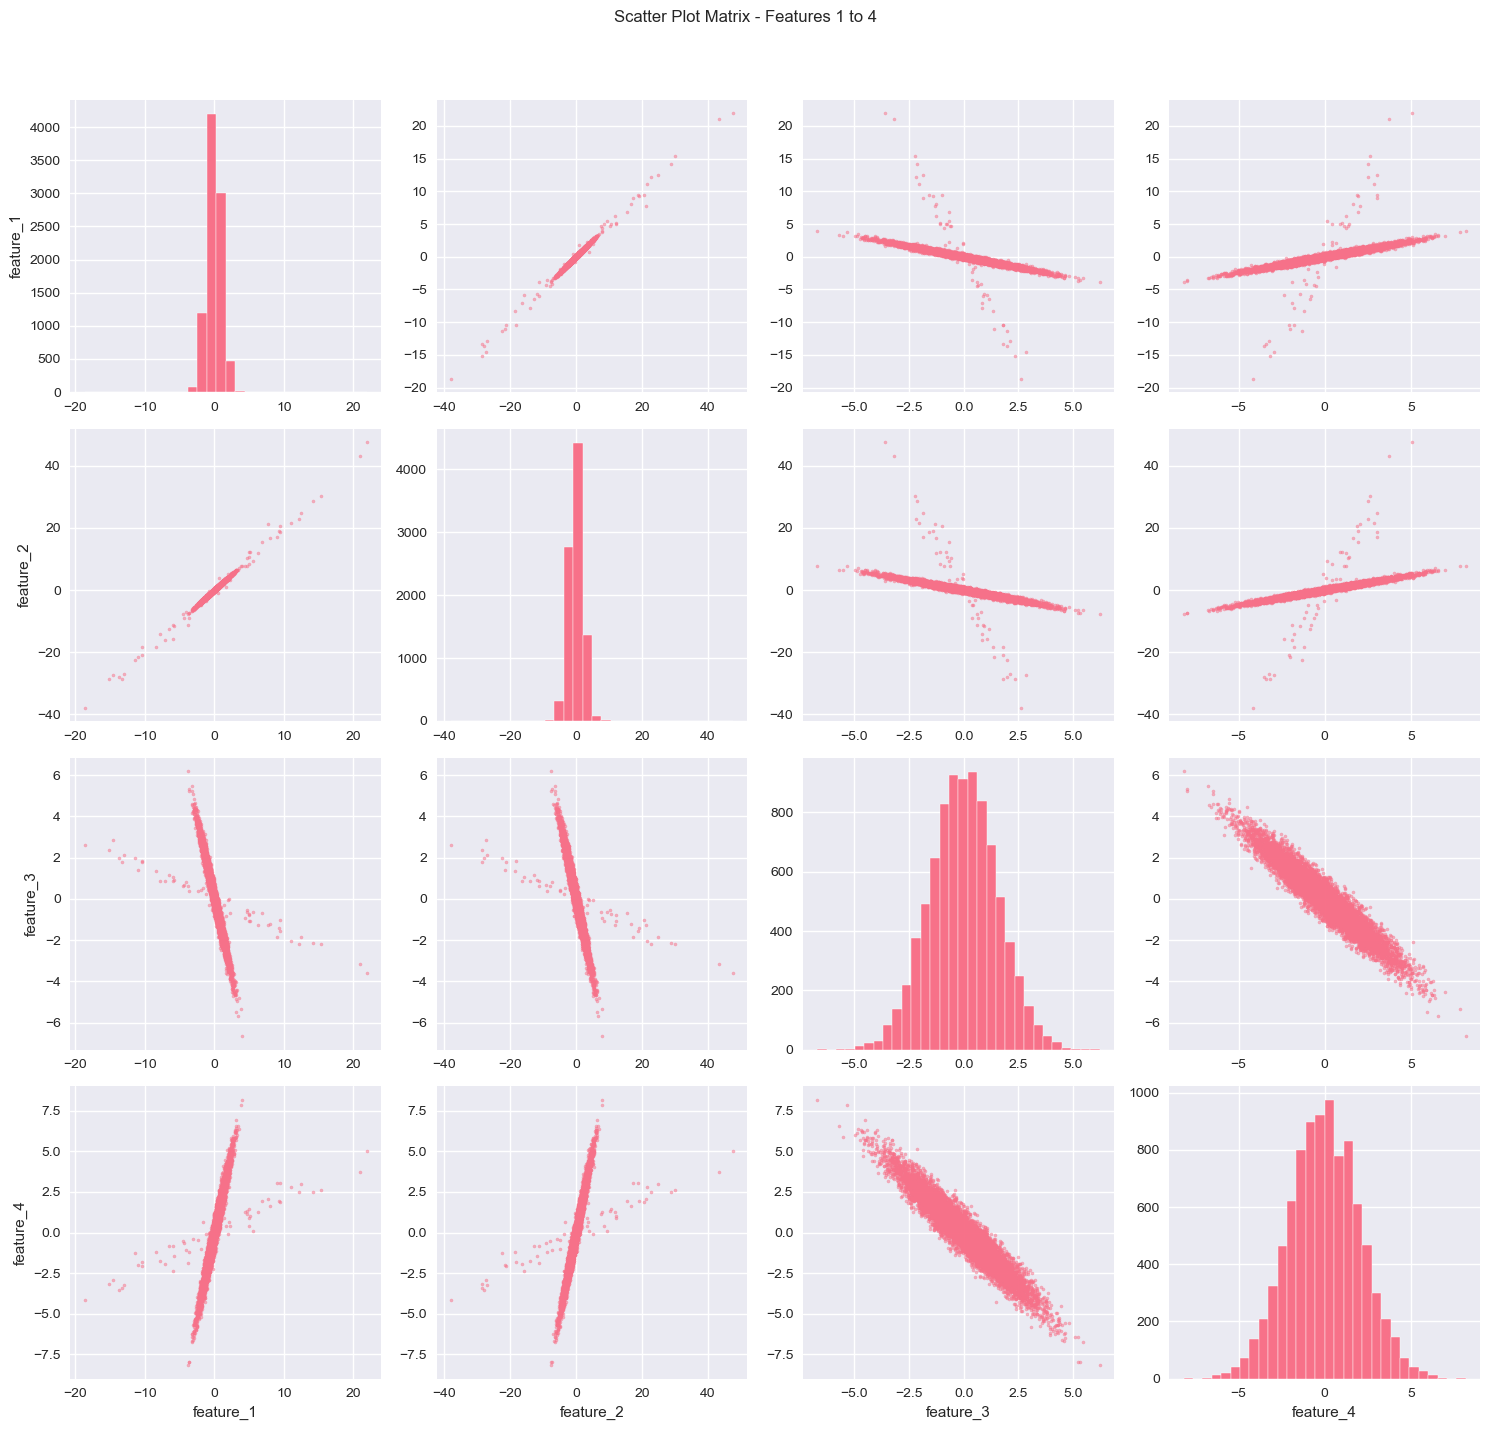

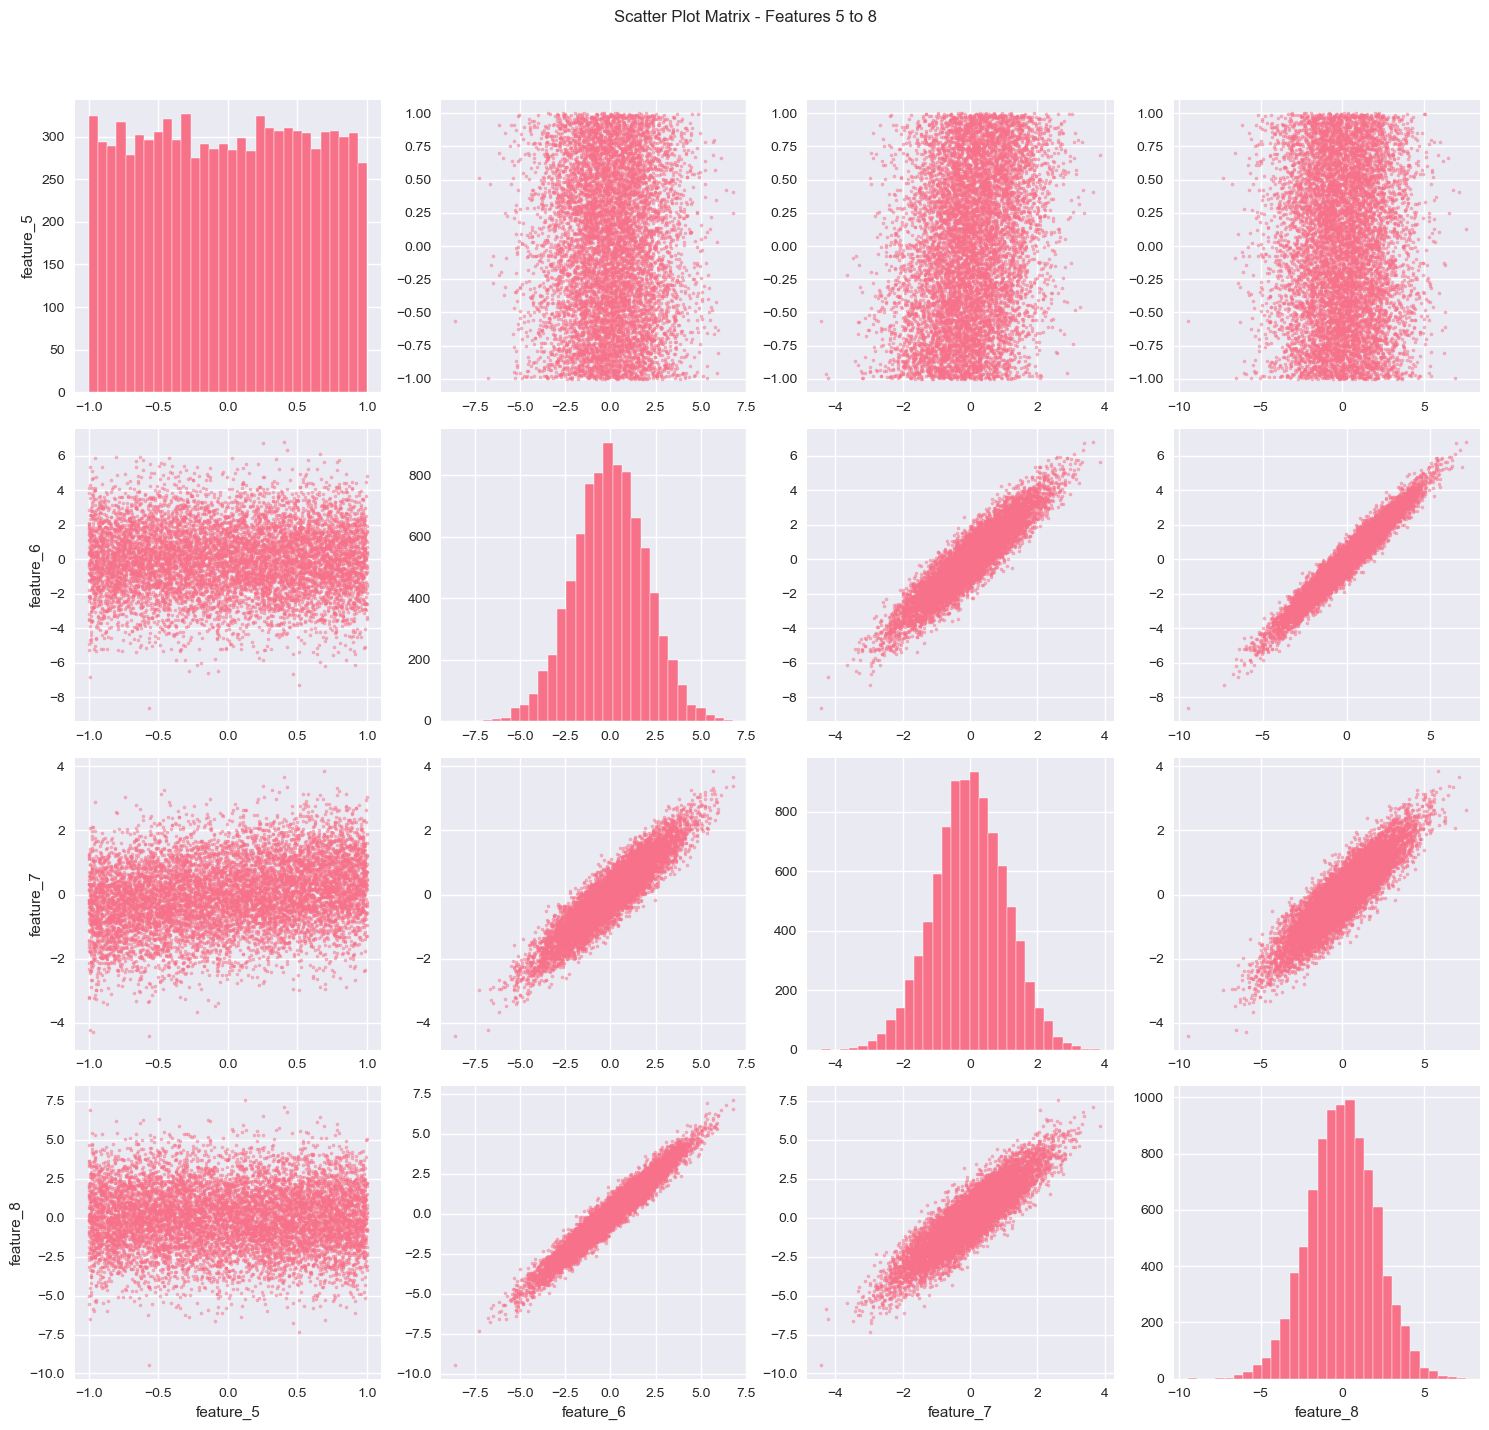

In [10]:
# Create scatter plot matrix for numerical features
numerical_features = df.select_dtypes(include=['float64']).columns
n_features = len(numerical_features)

# Create scatter plots in batches of 4 features to maintain readability
batch_size = 4
for i in range(0, n_features, batch_size):
    batch_features = numerical_features[i:i+batch_size]
    n_batch = len(batch_features)
    
    fig, axes = plt.subplots(n_batch, n_batch, figsize=(15, 15))
    fig.suptitle(f'Scatter Plot Matrix - Features {i+1} to {min(i+batch_size, n_features)}')
    
    for row in range(n_batch):
        for col in range(n_batch):
            if row != col:
                axes[row, col].scatter(
                    df[batch_features[col]], 
                    df[batch_features[row]], 
                    alpha=0.5, 
                    s=5
                )
            else:
                axes[row, col].hist(df[batch_features[row]], bins=30)
            
            if row == n_batch-1:
                axes[row, col].set_xlabel(batch_features[col])
            if col == 0:
                axes[row, col].set_ylabel(batch_features[row])
                
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### CELL 11: Feature Distribution Summary

In [11]:
# Create a comprehensive summary of feature distributions
print("Feature Distribution Summary:")
print("-" * 50)

for feature in numerical_features:
    print(f"\n{feature} Distribution Characteristics:")
    
    # Calculate distribution metrics
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    
    print(f"Skewness: {skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")
    
    # Determine distribution shape
    if abs(skewness) < 0.5:
        skew_desc = "approximately symmetric"
    elif abs(skewness) < 1:
        skew_desc = "moderately skewed"
    else:
        skew_desc = "highly skewed"
        
    if skewness > 0:
        skew_desc += " (right-tailed)"
    else:
        skew_desc += " (left-tailed)"
        
    print(f"Distribution shape: {skew_desc}")
    
    # Identify potential outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))][feature]
    
    print(f"Number of potential outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")

Feature Distribution Summary:
--------------------------------------------------

feature_1 Distribution Characteristics:
Skewness: 0.544
Kurtosis: 45.862
Distribution shape: moderately skewed (right-tailed)
Number of potential outliers: 113
Percentage of outliers: 1.26%

feature_2 Distribution Characteristics:
Skewness: 0.757
Kurtosis: 49.442
Distribution shape: moderately skewed (right-tailed)
Number of potential outliers: 106
Percentage of outliers: 1.18%

feature_3 Distribution Characteristics:
Skewness: -0.008
Kurtosis: 0.041
Distribution shape: approximately symmetric (left-tailed)
Number of potential outliers: 75
Percentage of outliers: 0.83%

feature_4 Distribution Characteristics:
Skewness: 0.014
Kurtosis: 0.047
Distribution shape: approximately symmetric (right-tailed)
Number of potential outliers: 71
Percentage of outliers: 0.79%

feature_5 Distribution Characteristics:
Skewness: -0.008
Kurtosis: -1.205
Distribution shape: approximately symmetric (left-tailed)
Number of pote